<a href="https://colab.research.google.com/github/seakss/SpokenArabicDigits/blob/main/ArabicDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Arabic Digits Analysis

## Importing libraries

Here I am importing libraries which will help me analyse the data

In [3]:
import matplotlib.pyplot as plt #visualisation
import pandas as pd #data manipulation, analysis and cleaning
import seaborn as sns #visualisation

Reading file

In [7]:
df = pd.read_csv('Test_Arabic_Digit.txt')

In [9]:
df.describe()

,1.2572 -8.2449 0.8483 -1.5782 0.4736 -0.063273 0.42481 0.50017 0.7042 0.28973 0.076053 0.025883 -0.22968
count,87062
unique,86141
top,1.9129 -2.7351 1.0104 0.066061 -1.1667 -0.8870...
freq,2


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [12]:
def load_blocks(path):
    blocks = []
    cur = []

    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                if cur:
                    blocks.append(np.array(cur, dtype=np.float32))
                    cur = []
                continue
            cur.append([float(x) for x in line.split()])

    if cur:
        blocks.append(np.array(cur, dtype=np.float32))
    return blocks

In [13]:
train_blocks = load_blocks("Train_Arabic_Digit.txt")
test_blocks  = load_blocks("Test_Arabic_Digit.txt")

print(f"Train utterances: {len(train_blocks)}")
print(f"Test utterances : {len(test_blocks)}")

Train utterances: 6600
Test utterances : 2200


In [14]:
def check_mfcc_dim(blocks, name):
    bad = []
    for i, b in enumerate(blocks):
        if b.shape[1] != 13:
            bad.append((i, b.shape))
    print(f"{name}: {len(bad)} invalid utterances")
    return bad

check_mfcc_dim(train_blocks, "Train")
check_mfcc_dim(test_blocks, "Test")

Train: 0 invalid utterances
Test: 0 invalid utterances


[]

In [15]:
def length_stats(blocks, name):
    lengths = np.array([b.shape[0] for b in blocks])
    print(f"\n{name} sequence lengths:")
    print(f"  Min: {lengths.min()}")
    print(f"  Max: {lengths.max()}")
    print(f"  Mean: {lengths.mean():.2f}")
    print(f"  Std: {lengths.std():.2f}")
    return lengths

train_lengths = length_stats(train_blocks, "Train")
test_lengths  = length_stats(test_blocks, "Test")


Train sequence lengths:
  Min: 4
  Max: 93
  Mean: 39.89
  Std: 8.72

Test sequence lengths:
  Min: 7
  Max: 83
  Mean: 39.57
  Std: 8.04


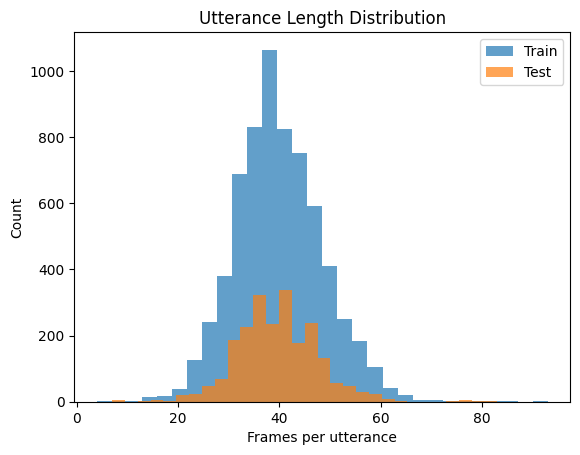

In [16]:
plt.hist(train_lengths, bins=30, alpha=0.7, label="Train")
plt.hist(test_lengths, bins=30, alpha=0.7, label="Test")
plt.xlabel("Frames per utterance")
plt.ylabel("Count")
plt.title("Utterance Length Distribution")
plt.legend()
plt.show()

In [17]:
def mfcc_stats(blocks):
    all_frames = np.vstack(blocks)
    return all_frames.mean(axis=0), all_frames.std(axis=0)

train_mean, train_std = mfcc_stats(train_blocks)
test_mean, test_std   = mfcc_stats(test_blocks)

print("Train MFCC mean:", train_mean)
print("Train MFCC std :", train_std)
print("Test  MFCC mean:", test_mean)
print("Test  MFCC std :", test_std)

Train MFCC mean: [ 1.9802856  -3.0797114  -0.36043555 -1.1464967  -0.6885425  -0.6174982
 -0.28101072 -0.43159732 -0.14117728 -0.39886373 -0.2697846  -0.16666904
 -0.1443034 ]
Train MFCC std : [2.7501636  2.1278539  1.736533   1.295962   1.0715071  0.8722286
 0.72935545 0.83550876 0.64966875 0.6362679  0.6290572  0.5918004
 0.53944063]
Test  MFCC mean: [ 2.1935332  -3.2257202  -0.44962332 -1.2559838  -0.76472074 -0.6777276
 -0.3345634  -0.5202343  -0.13617748 -0.44942912 -0.33901262 -0.2566464
 -0.14912799]
Test  MFCC std : [2.7773356  1.7966032  1.6606858  1.3097196  1.0625945  0.90920776
 0.72883135 0.8290366  0.6609481  0.6158757  0.64946043 0.59452766
 0.5177897 ]


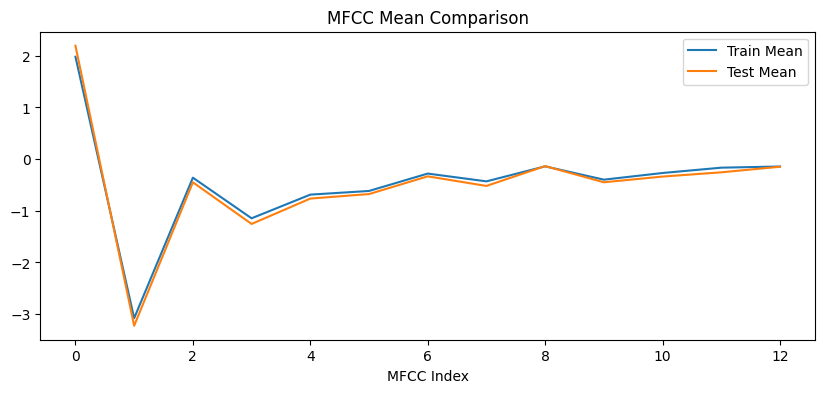

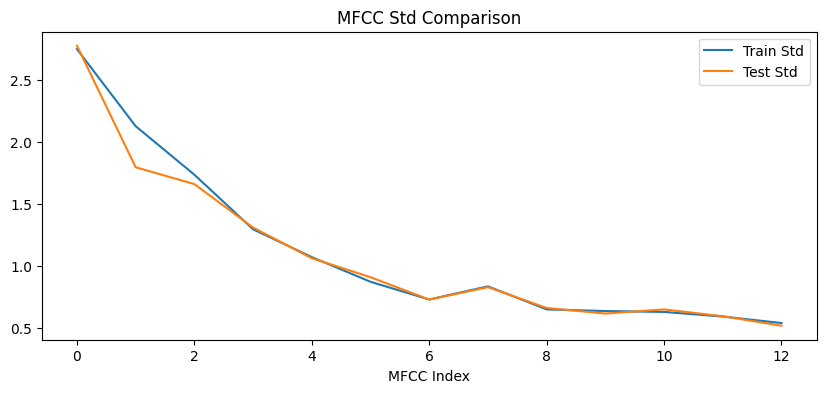

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(train_mean, label="Train Mean")
plt.plot(test_mean, label="Test Mean")
plt.title("MFCC Mean Comparison")
plt.xlabel("MFCC Index")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(train_std, label="Train Std")
plt.plot(test_std, label="Test Std")
plt.title("MFCC Std Comparison")
plt.xlabel("MFCC Index")
plt.legend()
plt.show()

In [23]:
def assign_labels(n_blocks, blocks_per_digit):
    return np.arange(n_blocks) // blocks_per_digit

train_labels = assign_labels(len(train_blocks), 660)

In [20]:
digit_lengths = defaultdict(list)

for block, d in zip(train_blocks, train_labels):
    digit_lengths[d].append(block.shape[0])

for d in range(10):
    lengths = np.array(digit_lengths[d])
    print(f"Digit {d}: mean={lengths.mean():.1f}, std={lengths.std():.1f}")

Digit 0: mean=35.4, std=6.6
Digit 1: mean=34.3, std=6.3
Digit 2: mean=42.3, std=7.9
Digit 3: mean=44.6, std=6.6
Digit 4: mean=41.8, std=6.8
Digit 5: mean=32.8, std=9.3
Digit 6: mean=43.9, std=7.0
Digit 7: mean=37.8, std=7.1
Digit 8: mean=49.8, std=6.8
Digit 9: mean=36.3, std=5.2


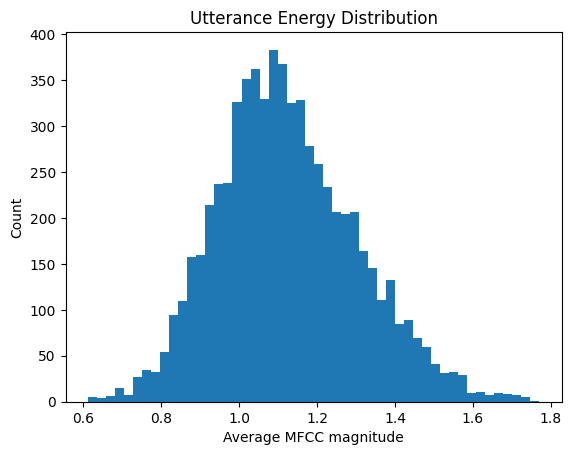

In [21]:
def utterance_energy(block):
    return np.mean(np.abs(block))

train_energy = np.array([utterance_energy(b) for b in train_blocks])

plt.hist(train_energy, bins=50)
plt.xlabel("Average MFCC magnitude")
plt.ylabel("Count")
plt.title("Utterance Energy Distribution")
plt.show()

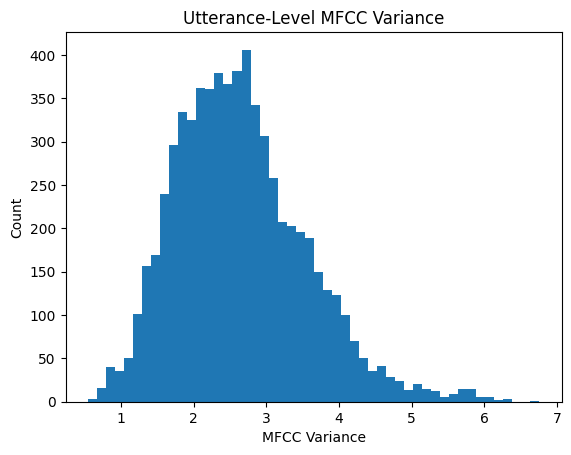

In [22]:
utterance_var = np.array([b.var() for b in train_blocks])

plt.hist(utterance_var, bins=50)
plt.xlabel("MFCC Variance")
plt.ylabel("Count")
plt.title("Utterance-Level MFCC Variance")
plt.show()